In [1]:
#First import the packages and libraries needed for data manipulation, visualization and the the decision tree
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#sklearn includes the packages we need for the decision tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#import the data from the webpage into a dataframe called DF
DF = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt", sep= '\s+', header=None)
#Rename columns since they don't come with headers
DF.columns=['Area','Perimeter','Compactness','Length of Kernal','Width of Kernel','Asymmetry Coefficient','Length of kernel groove','Class']

In [3]:
#Check to make sure the data looks right in the data frame
DF.describe()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
#Assign our Y vairable which will in this case be class
Y = DF['Class']
#Edit the main data frame so it no longer includes the class attribute
X = DF.drop(['Class'], axis = 1)

Text(0, 0.5, 'Number of records')

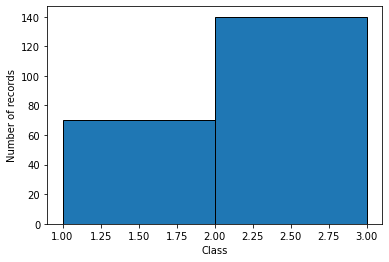

In [5]:
#We can look at the distribution of the target variable before we get started with the tree
plt.hist(DF["Class"], bins = 2, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

In [7]:
#Use the train test split function to separate the training set from the test set.  
#In this case I chose 5/7 to give us a 50 20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=5/7, stratify=Y)  

In [8]:
#This is where we specify what kind of classifier we will use.  In this case we will use the Gini classifier
clf = tree.DecisionTreeClassifier(criterion='gini')

In [9]:
#Then we will train the classifier on our training set
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [10]:
#Predictions help us build our confusion matrix
Y_predictions = clf.predict(X_test)

In [11]:
#Build the confusion matrix and call it cm
cm = confusion_matrix(Y_predictions, Y_test)

In [12]:
#Define the cariable accuracy using the proper equation.  We want the correct values over the total
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [13]:
#print the accuracy
accuracy(cm)
#The accuracy shows how good the model is at Identifying what kind of seed we have based on the measurements given.  
#Most of the time i run it  the accuracy is over 90% which is pretty good 

0.95

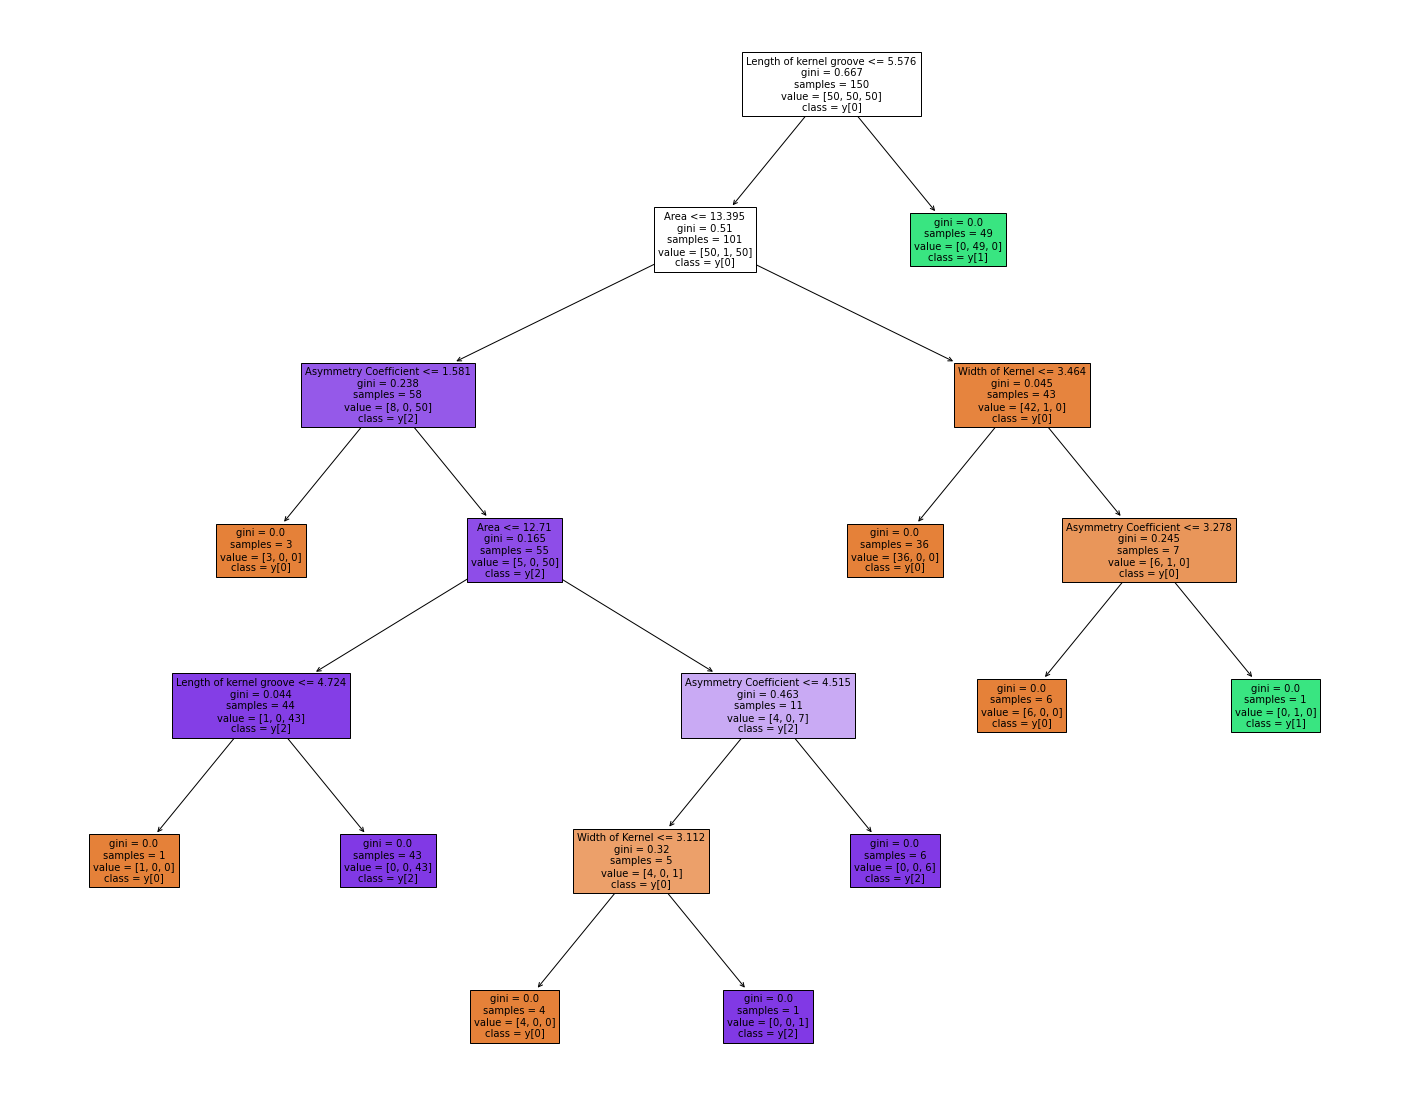

In [14]:
#show the tree for visualization
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()
#Sometimes the decision tree will choose different ways and orders of splitting the data.  Most of the time
#it splits by Length of Kernel grove first and then asymmetry coefficient